# Reversing a Pulse Template

The `TimeReversalPulseTemplate` allows to reverse arbitrary pulse templates. Let us start with a pulse that has a clear time ordering.

C:\Users\Simon\Documents\git\qupulse\qupulse\utils\sympy.py:26: UserWarning: scipy is not installed. This reduces the set of available functions to those present in numpy + manually vectorized functions in math.
  warnings.warn('scipy is not installed. This reduces the set of available functions to those present in numpy + '


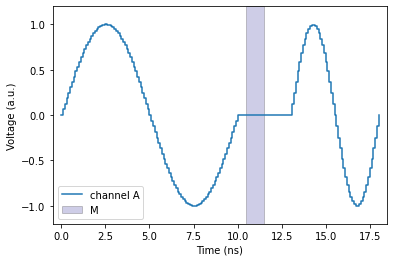

In [1]:
from qupulse.pulses import TimeReversalPT, FunctionPT, TablePT, plotting

forward_1 = FunctionPT('sin(2*pi*t / 10)', duration_expression='10', channel='A')
wait = TablePT({'A': [(0, 0), (3, 0)]}, measurements=[('M', 0.5, 1)])
forward_2 = FunctionPT('sin(2*pi*t / 5)', duration_expression='5', channel='A')

forward_all = forward_1 @ wait @ forward_2

_ = plotting.plot(forward_all, plot_measurements={'M'}, show=False)

We can now easily create the same pulse backward

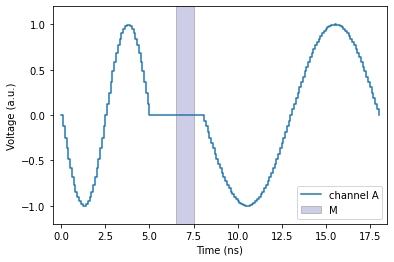

In [2]:
backward_all = TimeReversalPT(forward_all)
_ = plotting.plot(backward_all, plot_measurements={'M'}, show=False)

and use it in a composed template.

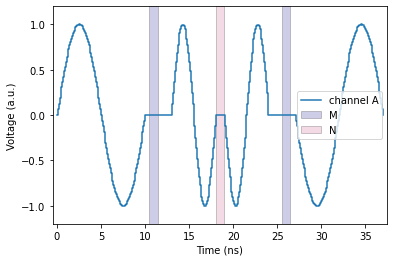

In [3]:
intermediate = TablePT({'A': [(0, 0), (1, 0)]}, measurements=[('N', 0, 1)])
composed = forward_all @ intermediate @ backward_all
_ = plotting.plot(composed, plot_measurements={'M', 'N'}, show=False)